In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
 df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
# Split the dataset into 80% test and 20% test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# Scale the dataset using minMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [ ]:
history = model.fit(X_train_scale,y_train,epochs=150,validation_split=0.2)


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.6053 - val_loss: 0.5705
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5047 - val_loss: 0.4501
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3830 - val_loss: 0.3346
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2742 - val_loss: 0.2309
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1917 - val_loss: 0.1424
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1125 - val_loss: 0.0743
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0536 - val_loss: 0.0308
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0109
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - val_loss: 0.0081
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0089 - val_loss: 0.007

In [ ]:
y_pred = model.predict(X_test_scale)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7920853241354806

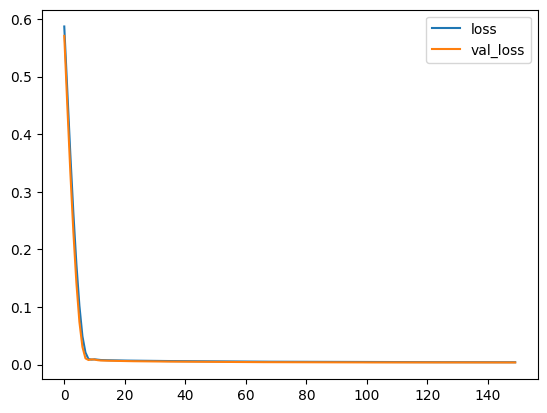

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])